In [6]:
import pathlib
import numpy as np
from fastai.vision import ImageList,cnn_learner,models, get_transforms, imagenet_stats, error_rate, ClassificationInterpretation


In [7]:
chrono_images_path = pathlib.Path('/Users/vedant/Documents/React Learning/Chrono_analyzer/code/images')

In [8]:
np.random.seed(42)

In [9]:
data = (ImageList.from_folder(chrono_images_path)
        .split_by_rand_pct()
        .label_from_re(r'.*\/(.+)-.+-.+.jpg')
        .databunch()
        .normalize(imagenet_stats)
        )
data

ImageDataBunch;

Train: LabelList (3107 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
rolex,cartier,seiko,panerai,patekphilippe
Path: /Users/vedant/Documents/React Learning/Chrono_analyzer/code/images;

Valid: LabelList (776 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
breitling,zenith,omega,zenith,breitling
Path: /Users/vedant/Documents/React Learning/Chrono_analyzer/code/images;

Test: None

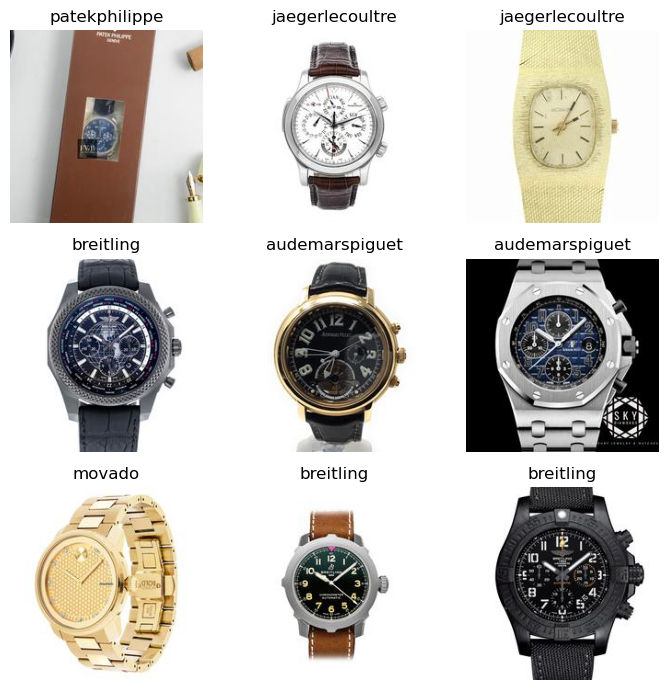

In [10]:
data.show_batch(rows=3, figsize=(7,7))

In [11]:
data.classes

['audemarspiguet',
 'breitling',
 'cartier',
 'gucci',
 'iwc',
 'jaegerlecoultre',
 'movado',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'seiko',
 'zenith']

In [12]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

/Users/vedant/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/Users/vedant/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [13]:
type(learner)

fastai.basic_train.Learner

In [14]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.010043,1.504654,0.449742,12:53
1,2.025667,1.322329,0.394330,13:32
2,1.447052,1.188809,0.371134,19:10
3,1.057001,1.122224,0.347938,18:05
4,0.802614,1.115844,0.346649,48:56


python(38938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39254) Malloc

In [17]:
interpretation = ClassificationInterpretation.from_learner(learner)

python(40380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


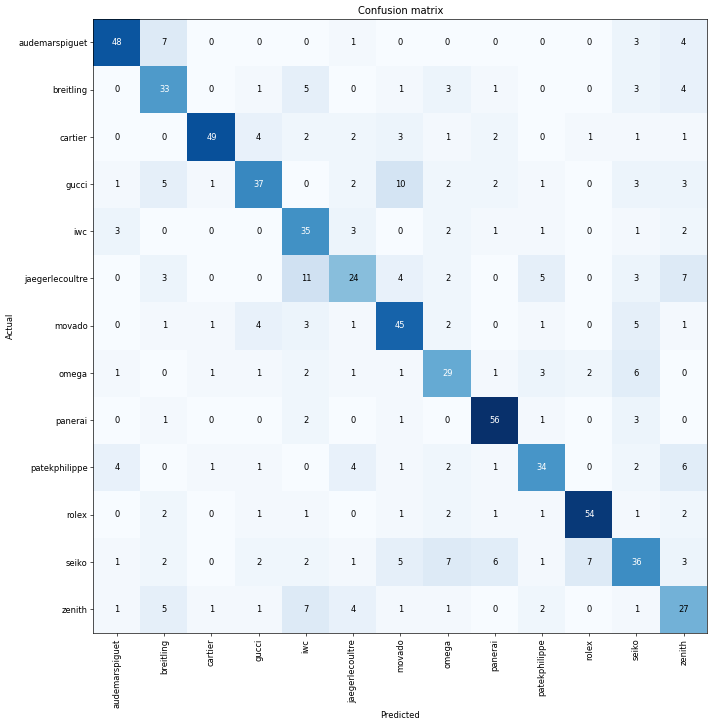

In [18]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

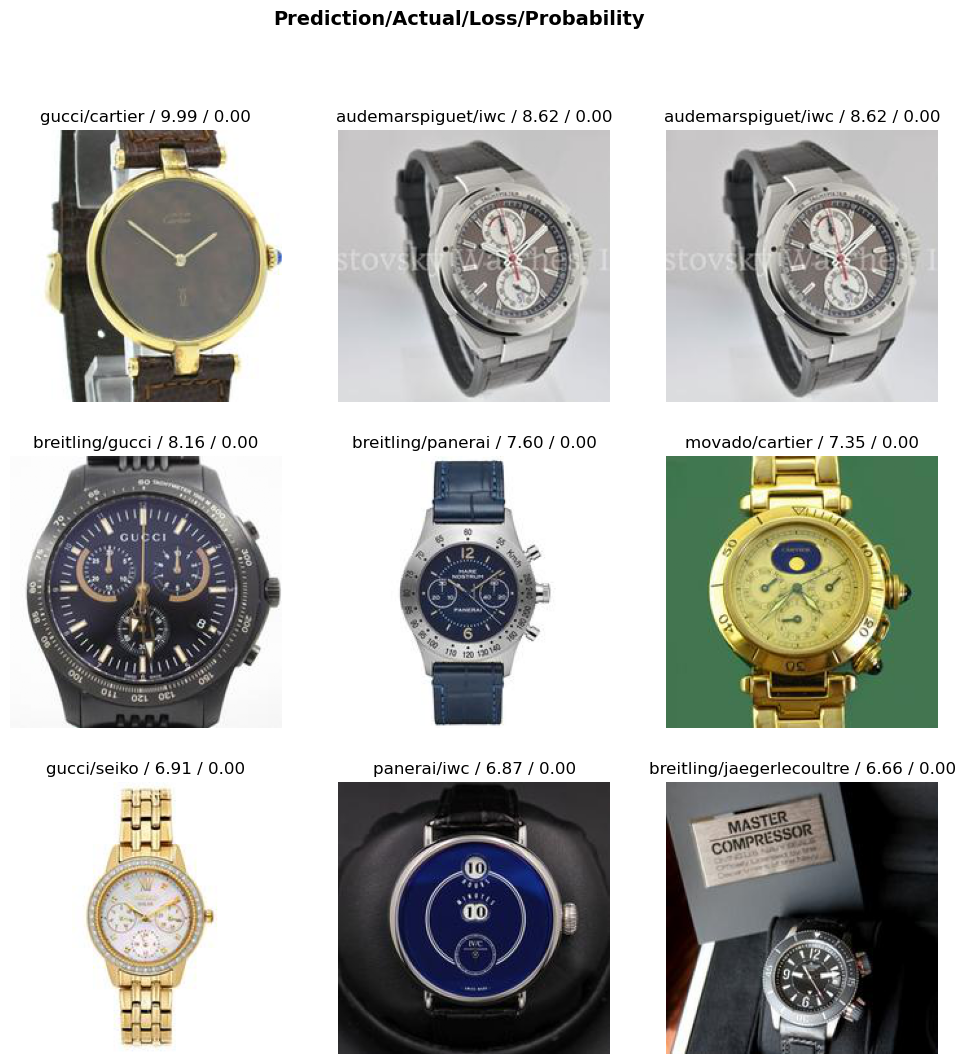

In [40]:
interpretation.plot_top_losses(9, figsize=(12,12))

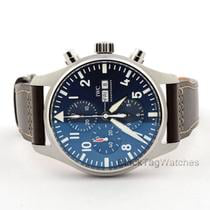

In [31]:
data.valid_ds[105][0]

In [38]:
learner.predict(data.valid_ds[105][0])

(Category tensor(4),
 tensor(4),
 tensor([5.1779e-05, 5.8023e-04, 2.4401e-05, 8.4067e-05, 9.9698e-01, 5.7680e-04,
         4.1015e-05, 3.9693e-04, 2.4843e-04, 4.1636e-05, 1.4823e-05, 1.1574e-04,
         8.4538e-04]))

In [39]:
data.classes

['audemarspiguet',
 'breitling',
 'cartier',
 'gucci',
 'iwc',
 'jaegerlecoultre',
 'movado',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'seiko',
 'zenith']

In [33]:
learner.save('stage-1')

In [34]:
learner.lr_find()

python(40588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40783) Malloc

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [36]:
data.classes

['audemarspiguet',
 'breitling',
 'cartier',
 'gucci',
 'iwc',
 'jaegerlecoultre',
 'movado',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'seiko',
 'zenith']

ValueError: x and y must have same first dimension, but have shapes (23,) and (22,)

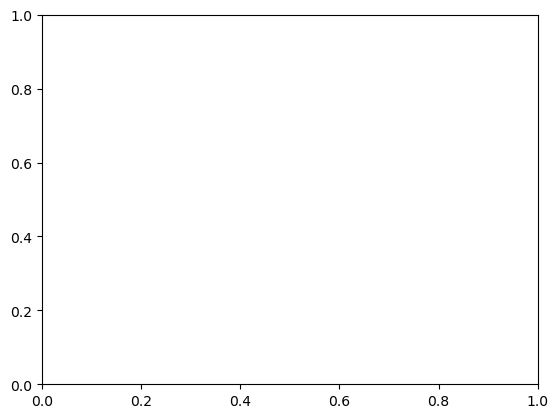

In [37]:
learner.recorder.plot()

In [41]:
learner.unfreeze()

In [42]:
learner.fit_one_cycle(5, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.237841,3.847810,0.601804,31:34
1,1.345641,2.141743,0.500000,46:01
2,0.938451,0.896124,0.252577,29:37
3,0.519762,0.742550,0.213918,1:30:44
4,0.243351,0.667523,0.189433,24:51


python(41376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(41386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42046) Malloc

In [43]:
learner.save('stage-2')

In [44]:
learner.export('classifier.pkl')